## Logistic Regression Project Exercise
### Enrico Absin
***
### Exploratory Data Analysis and Visualization
- Perform EDA and explain each graph

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# fetch dataset 
heart_disease = fetch_ucirepo(id=45)  
X = heart_disease.data.features 
y = heart_disease.data.targets 

df = pd.concat([X, y], axis=1)

print(df.info())
print(df.describe())
print(df.columns)
print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

### Visualization Tasks
TASK: Create a bar plot that shows the total counts per target value.

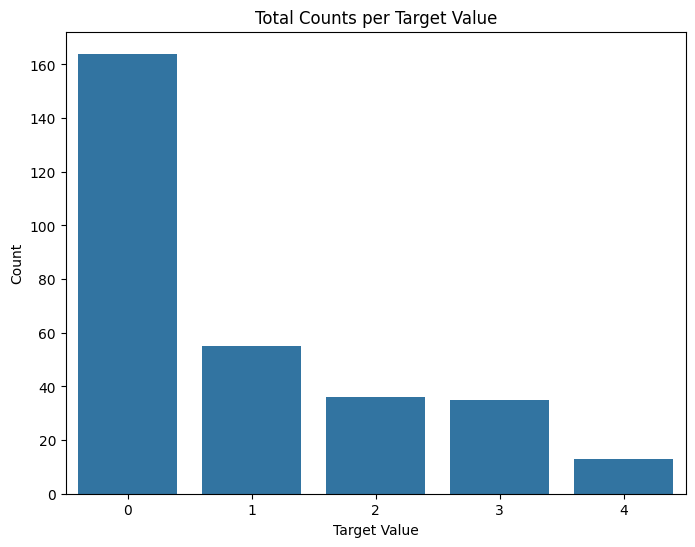

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df)
plt.title('Total Counts per Target Value')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()

TASK: Create a pairplot that displays the relationships between the following columns:

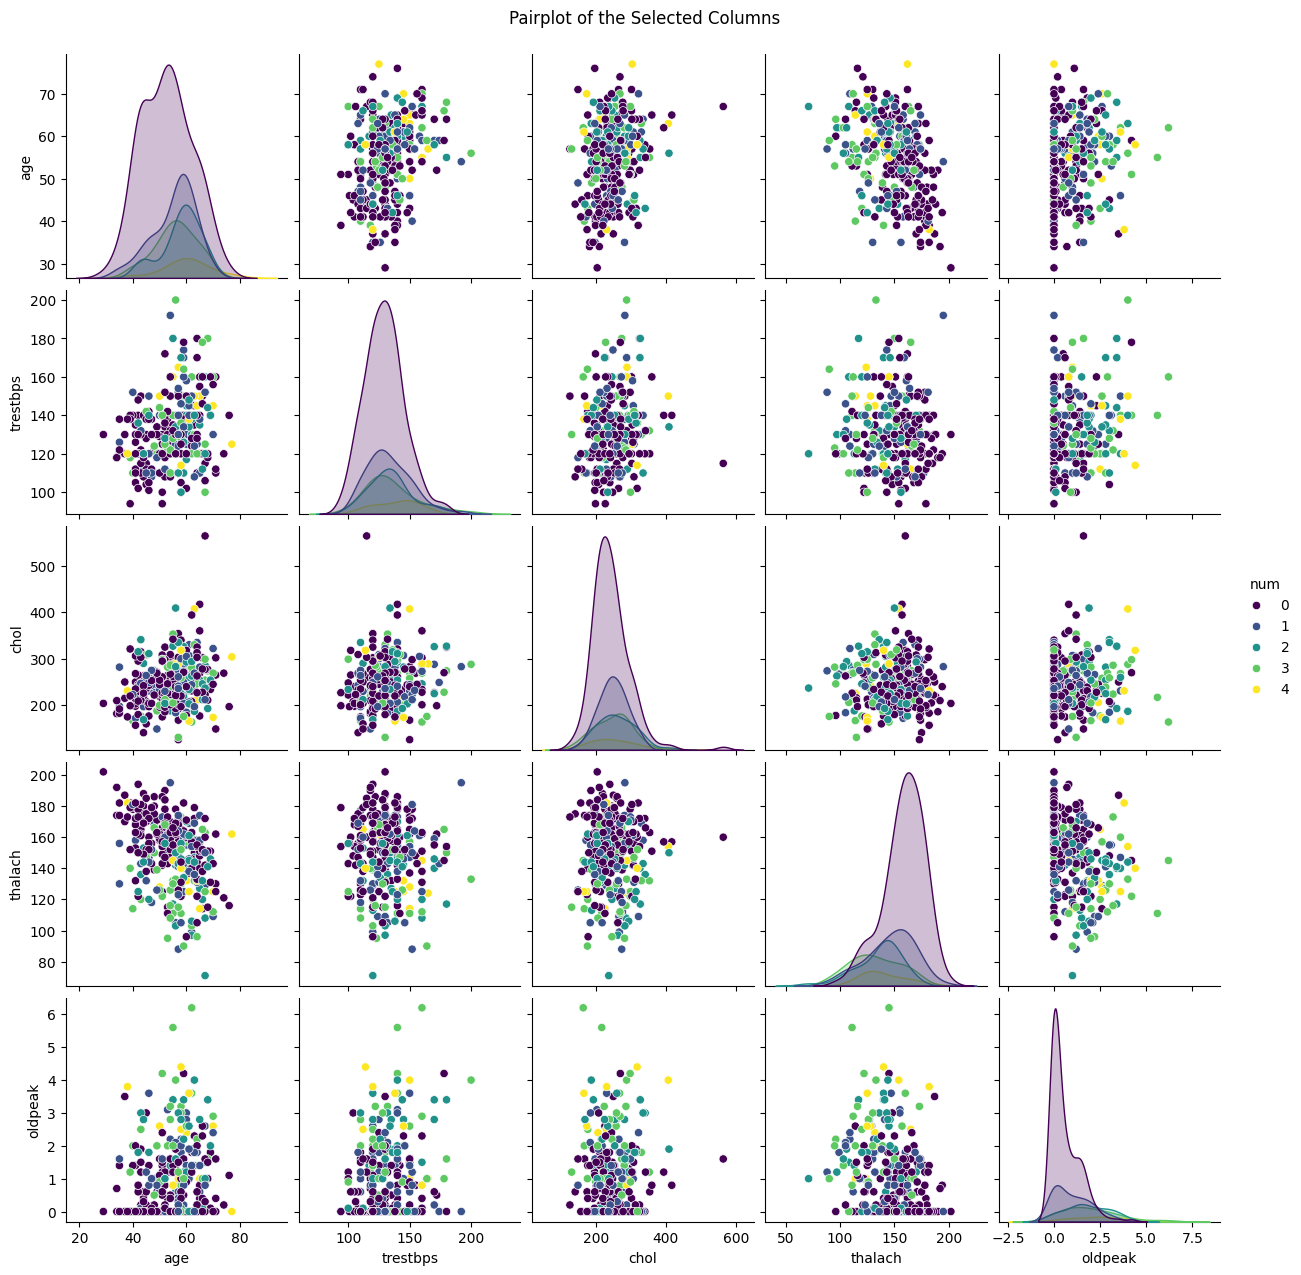

In [3]:
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']
sns.pairplot(df[selected_columns], hue='num', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of the Selected Columns', y=1.02)
plt.show()

TASK: Create a heatmap that displays the correlation between all the columns.

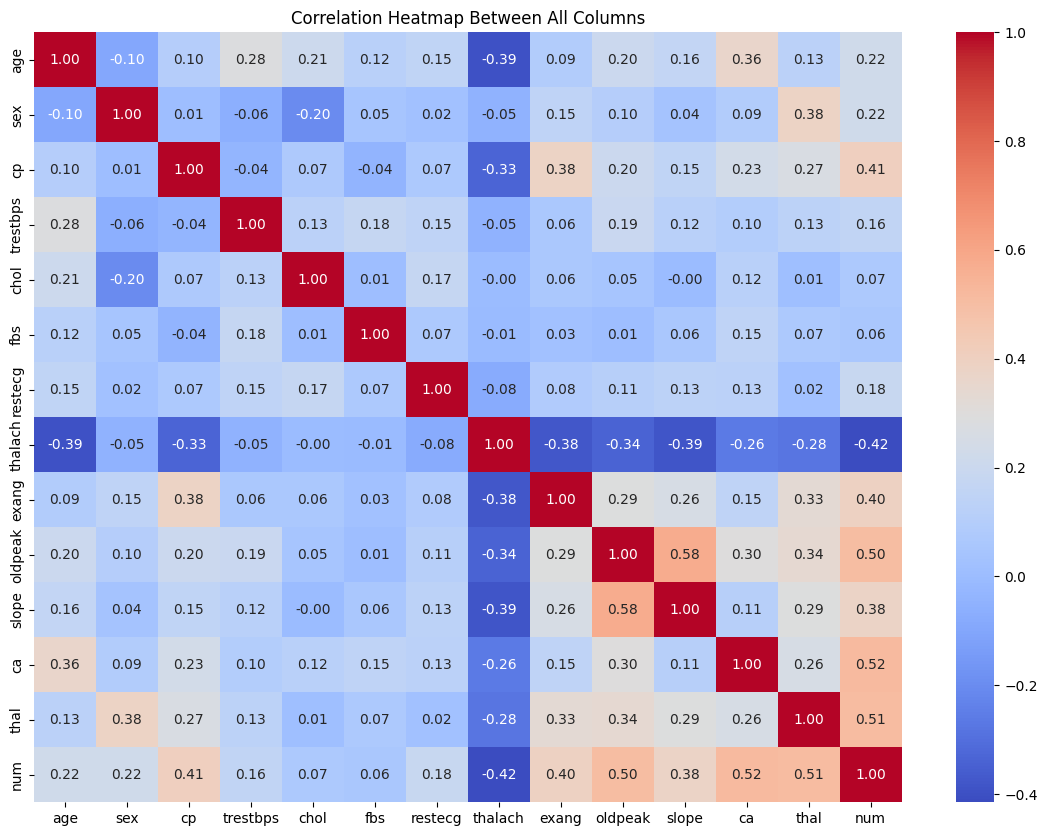

In [4]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Between All Columns')
plt.show()

### Modeling Task
#### Train | Test Split and Scaling
TASK: Separate the features from the labels into 2 objects, X and y.

In [5]:
X = df.drop('num', axis=1)
y = df['num']

TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

TASK: Create a StandardScaler object and normalize the X train and test set feature data.

In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


nan_indices = np.isnan(X_train_scaled).any(axis=1)

X_train_scaled_clean = X_train_scaled[~nan_indices]
y_train_clean = y_train[~nan_indices]

### Logistic Regression Model
TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use LogisticRegressionCV OR use a combination of LogisticRegression and GridSearchCV. The choice is up to you.\
TASK: Report back your search's optimal parameters, specifically the C value.

In [8]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(X_train_scaled)

lr_cv = LogisticRegressionCV(Cs=10, cv=5, random_state=0, max_iter=1000)

lr_cv.fit(X_train_scaled_clean, y_train_clean)

best_C = lr_cv.C_[0]
print("C value:", best_C)

C value: 0.3593813663804626


#### Coeffecients
TASK: Report back the model's coefficients.

In [9]:
coefficients = lr_cv.coef_
print("Model's Coefficients:")
for feature, coef in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coef}")

Model's Coefficients:
age: 0.009594707729307862
sex: -0.3005907477300181
cp: -0.4676632245395007
trestbps: -0.2983964024967241
chol: -0.2578292907123662
fbs: 0.23784053756283857
restecg: -0.1500774484202452
thalach: 0.27382032352964764
exang: -0.3296135679046283
oldpeak: -0.40686403093313495
slope: -0.3538448286483714
ca: -0.9829579151294979
thal: -0.6983814433241115


TASK: Create a visualization of the coefficients.

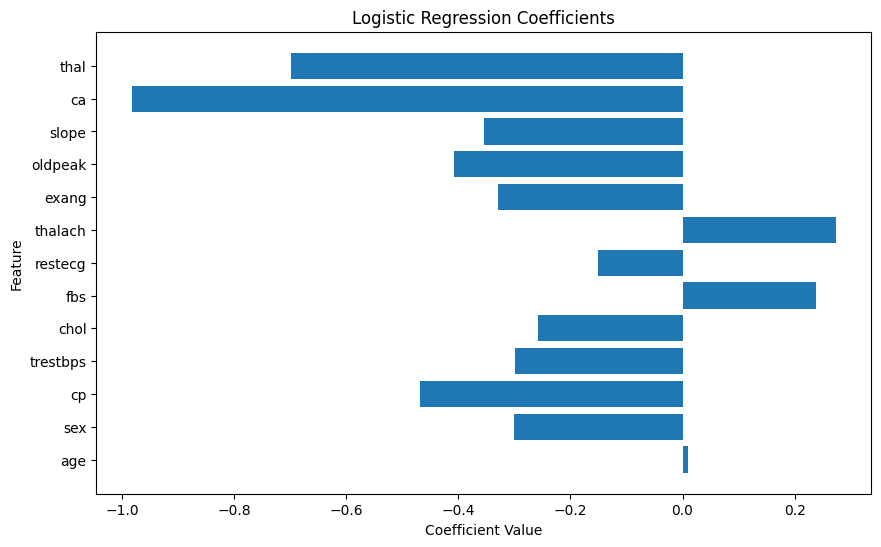

In [10]:
coefficients = lr_cv.coef_[0]

feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

---

### Model Performance Evaluation
TASK: Evaluate your model on the remaining 5% of the data, the test set.\
TASK: Create the following evaluations:

- Confusion Matrix Array
- Confusion Matrix Plot
- Classification Report

Confusion Matrix Array:
 [[5 0 2 0]
 [2 1 1 0]
 [2 0 0 1]
 [0 1 1 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.50      0.25      0.33         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.38        16
   macro avg       0.26      0.24      0.24        16
weighted avg       0.37      0.38      0.36        16



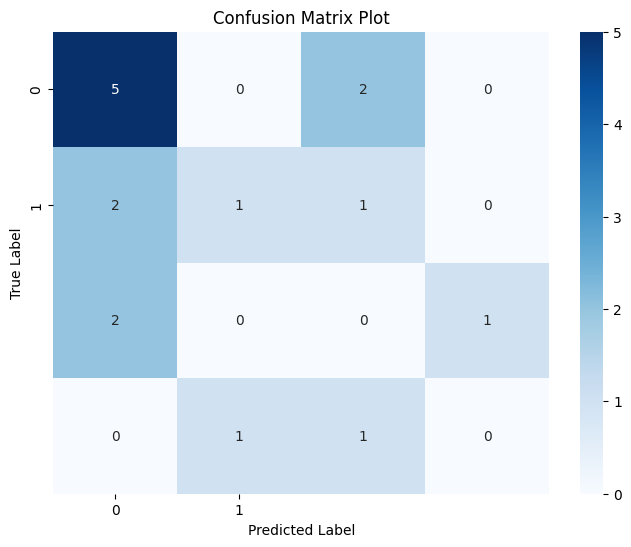

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = lr_cv.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Array:\n", cm)

cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Plot')
plt.show()

#### Performance Curves
TASK: Create both the precision recall curve and the ROC Curve.


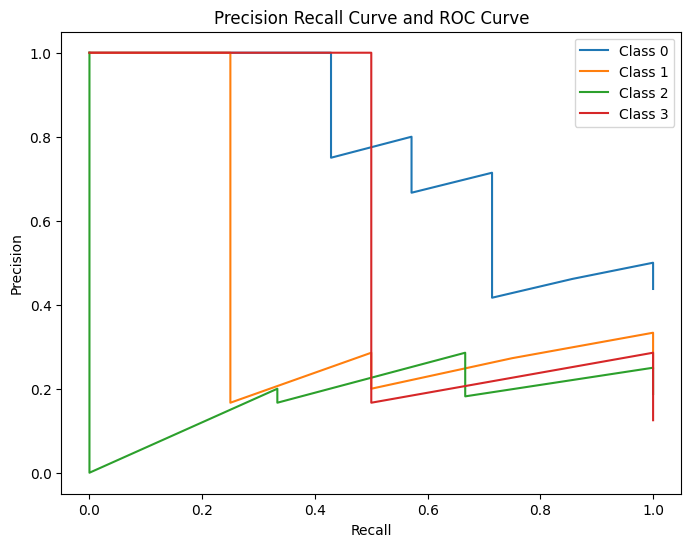

In [12]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

classes=[0, 1, 2, 3]
y_test_bin = label_binarize(y_test, classes=classes)

precision = dict()
recall = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], lr_cv.predict_proba(X_test_scaled)[:, i])

plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(recall[i], precision[i], label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve and ROC Curve')
plt.legend(loc='best')
plt.show()